In [ ]:
# Dataset eval
import json
import os
folder = 'data/APPS/train/'
# folder = 'data/APPS/train/'
total = 0
for i in range(0, 5000):
    unit_test_file = folder+str(i).zfill(4)+'/input_output.json'
    # check if file exist
    if not os.path.exists(unit_test_file):
        continue
    with open(unit_test_file, 'r') as file:
        data = json.load(file)
        unit_test_count = len(data['inputs'])
        total += unit_test_count
avg = total/5000
print(avg)

In [ ]:
!chmod +x scripts/run_unit_tests.sh
!scripts/run_unit_tests.sh

In [ ]:
!chmod +x scripts/train_actor.sh
!scripts/train_actor.sh

In [ ]:
import time
# Required libraries
import os
import pickle
import pandas as pd
from datetime import timedelta

# Directory containing pickle files
directory_path = 'outputs/test_results_bl'  # Change this to your directory path

# List pickle files
pickle_files = [file for file in os.listdir(directory_path) if file.endswith('.pkl')]
problem_id_to_runtime = {}
# Function to load and display pickle file content
def load_and_display_pickle(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        test_id, data = next(iter(data.items()))
        print(data)
        results = data['results']
        times = data['times']
        error_types = data['errors']
        times_ms = []
        run_time_on_first_test = []
        for problem in times:
          temp = [] # program without run-time error
          for program in problem:
            if program: temp.append(program.microseconds/1000)
          times_ms.append(temp)
          if len(temp)>1:
            run_time_on_first_test.append(temp[0])
        problem_id_to_runtime[test_id] = run_time_on_first_test
        print(test_id)
        print(results)
        print(error_types)
        print(times_ms)
        print(run_time_on_first_test)
        print('-'*50)

# Display info for each pickle file
for pickle_file in pickle_files:
    print(pickle_file)
    file_path = os.path.join(directory_path, pickle_file)
    load_and_display_pickle(file_path)

In [4]:
# Code Inspection
import os
import json

file_path = 'data/APPS/train_rl/0003/baseline_solutions.json'
with open(file_path, 'r') as file:
    data = json.load(file)
    print(data[0]['code'])

import sys
import time
import itertools
from itertools import accumulate, product, permutations, combinations
import collections
from collections import Counter, OrderedDict, deque, defaultdict, ChainMap
from functools import lru_cache
import math
from math import sqrt, sin, cos, tan, ceil, fabs, floor, gcd, exp, log, log2
import fractions
from typing import List, Tuple
import numpy as np
import random
import heapq
from heapq import *
stdin = sys.stdin
stdout = sys.stdout
def code():
	t = int(input())
	for _ in range(t):
		n, k = list(map(int, input().split()))
		a = list(map(int, input().split()))
		a.sort(reverse=True)
		ans = 0
		for i in range(k+1):
			ans += a[i]
		print(ans)
	



In [16]:
file_path = 'data/APPS/train_rl/0003/gen_solutions.json'
with open(file_path, 'r') as file:
    data = json.load(file)
    print(data[9]['time'])
    print(data[9]['code'])

2.734
import sys
import time
import itertools
from itertools import accumulate, product, permutations, combinations
import collections
from collections import Counter, OrderedDict, deque, defaultdict, ChainMap
from functools import lru_cache
import math
from math import sqrt, sin, cos, tan, ceil, fabs, floor, gcd, exp, log, log2
import fractions
from typing import List, Tuple
import numpy as np
import random
import heapq
from heapq import *
stdin = sys.stdin
stdout = sys.stdout
def code():
	t = int(input())
	for _ in range(t):
		n, k = map(int, input().split())
		a = list(map(int, input().split()))
		a.sort()
		a.reverse()
		print(sum(a[:k+1]))
	



In [18]:
!chmod +x scripts/train_actor_rl.sh
!scripts/train_actor_rl.sh

{'batch_size_per_replica': 1,
 'clone_rl_head': False,
 'db': False,
 'deepspeed': None,
 'epochs': 10,
 'fp16': True,
 'grad_acc_steps': 4,
 'local_rank': -1,
 'log_freq': 1,
 'lr': 2e-05,
 'model': 'codet5-large',
 'model_path': 'models/codet5_finetuned_codeRL',
 'relative_returns': True,
 'sample_mode': 'uniform_sol',
 'save_dir': 'exps/codet5-large_rl_bs1x4_lr2e-05',
 'save_freq': 1,
 'save_total_limit': 2,
 'train_path': 'data/APPS/train_rl/',
 'tuning_mode': 'rl'}
Loading 10 problems from data/APPS/train_rl/.
  0%|                                                    | 0/10 [00:00<?, ?it/s]baseline error type: 3, baseline runtime: 27.708
problem:0003, bl runtime:27.708
problem:0003, runtime:6.813
problem:0003, runtime:2.991
problem:0003, runtime:14.28
problem:0003, runtime:25.278
problem:0003, runtime:11.238
problem:0003, runtime:2.83
problem:0003, runtime:10.284
problem:0003, runtime:8.653
problem:0003, runtime:2.93
problem:0003, runtime:2.734
baseline error type: 1, baseline runt

In [37]:
def get_gen_runtime(data_root_dir, problem_id):
  json_file_path = data_root_dir+str(problem_id).zfill(4)+'/gen_solutions.json'
  # check if the file exist
  if not os.path.exists(json_file_path):
    return []
  else:
    with open(json_file_path, 'r') as file:
      data = json.load(file)
      runtimes = []
      for i in range(0, len(data)):
        if data[i]['time'] != None:
          runtimes.append(data[i]['time'])
      return runtimes

def get_baseline_runtime(data_root_dir, problem_id):
    json_file_path = data_root_dir+str(problem_id).zfill(4)+'/baseline_solutions.json'
    # check if the file exist
    if not os.path.exists(json_file_path):
        return []
    else:
        with open(json_file_path, 'r') as file:
            data = json.load(file)
        if data[0]['time'] == None:
            return []
        return [data[0]['time']]

In [ ]:
# Dataset eval
import json
import os
# get the difficulty mapping for each problem
problem_dir = 'data/APPS/train/'
problem_difficulty = {} # problem_id -> difficulty
for i in range(0, 5000):
  json_file_path = problem_dir+str(i).zfill(4)+'/metadata.json'
  # check if the file exist
  if not os.path.exists(json_file_path):
    continue
  else:
    print(i)
    with open(json_file_path, 'r') as file:
      data = json.load(file)
      problem_difficulty[i] = data['difficulty']
print(problem_difficulty)
# save the map in json
with open('train_problem_difficulty.json', 'w') as file:
  json.dump(problem_difficulty, file)


In [4]:
def get_gen_solution_info(data_root_dir, problem_id):
  json_file_path = data_root_dir+str(problem_id).zfill(4)+'/gen_solutions.json'
  # check if the file exist
  if not os.path.exists(json_file_path):
    return [],[]
  else:
    with open(json_file_path, 'r') as file:
      data = json.load(file)
      runtimes = []
      results = []
      for i in range(0, len(data)):
        # runtimes.append(data[i]['time'])
        results.append(data[i]['result'])
      return results, runtimes

# save all data in json file
json_data = {}
for i in range(0, 5000):
    results, runtimes = get_gen_solution_info('data/APPS/sample/', i)
    json_data[i] = {}
    json_data[i]['results'] = results
    # json_data[i]['runtimes'] = runtimes

with open('train_gen_solutions.json', 'w') as file:
    json.dump(json_data, file)



In [8]:
# load the above json file
with open('train_gen_solutions.json', 'r') as file:
    data = json.load(file)
data['23']['results']

[]

[6.813, 2.991, 14.28, 25.278, 11.238, 2.83, 10.284, 8.653, 2.93, 2.734]


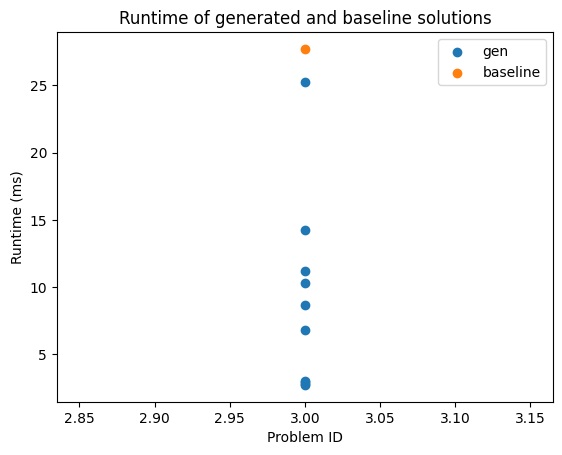

In [38]:
data_root_dir = 'data/APPS/train_rl/'
# for scatter plot
import matplotlib.pyplot as plt
gen_runtimes = []
baseline_runtimes = []
problem_ids = []
problem_ids_bl = []

for i in range(0, 5000):
    gen_runtime = get_gen_runtime(data_root_dir, i)
    baseline_runtime = get_baseline_runtime(data_root_dir, i)
    if len(gen_runtime) == 0 or len(baseline_runtime) == 0:
        continue
    gen_runtimes.extend(gen_runtime)
    baseline_runtimes.extend(baseline_runtime)
    problem_ids.extend([i] * len(gen_runtime))
    problem_ids_bl.append(i)
print(gen_runtimes)
plt.scatter(problem_ids, gen_runtimes, label='gen')
plt.scatter(problem_ids_bl, baseline_runtimes, label='baseline')
plt.legend()
plt.xlabel('Problem ID')
plt.ylabel('Runtime (ms)')
plt.title('Runtime of generated and baseline solutions')
plt.show()
# save plot
plt.savefig('outputs/gen_baseline_runtimes.png')

# save gen_runtimes, baseline_runtimes, problem_ids, problem_ids_bl as a json
import json
data = {}
data['gen_runtimes'] = gen_runtimes
data['baseline_runtimes'] = baseline_runtimes
data['problem_ids'] = problem_ids
data['problem_ids_bl'] = problem_ids_bl
with open('outputs/gen_baseline_runtimes.json', 'w') as outfile:
    json.dump(data, outfile)

In [ ]:
x_stretched = np.linspace(0, 500, 500)

# Define the stretched function
y_stretched = 0.5 + 0.5 * np.exp(-(x_stretched / 500) ** 2)

# Plot the stretched function
plt.figure(figsize=(10, 5))
plt.plot(x_stretched, y_stretched, label='0.5 + 0.5 * e^{-(x/500)^2}')
plt.title('Stretched Exponential Decay Function')
plt.xlabel('x')
plt.ylabel('y')
# adjust x scale
plt.xlim(0, 500)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# load json, modify a field and save back to the old file. 
data_root_dir = 'data/APPS/train_rl/'
for i in range(0, 5000):
    print(i)
    json_file_path = data_root_dir+str(i).zfill(4)+'/gen_solutions.json'
    # check if the file exist
    if not os.path.exists(json_file_path):
        continue
    else:
        with open(json_file_path, 'r') as file:
            data = json.load(file)
            for j in range(0, len(data)):
                old_data = data[j]['result']
                # if old_data is a list
                if isinstance(old_data, list):
                    passed = True
                    for test_result in old_data:
                        if test_result!=True:
                            passed = False
                            break
                    data[j]['result'] = passed
        with open(json_file_path, 'w') as file:
            json.dump(data, file)